<h3><center>Music Genre Classification Using Recurrent Neural Network</center></h3>

##### Imports

In [543]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import Sequential
from keras.regularizers import L1L2
from keras.layers import Input, Dense, Dropout, LSTM
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#### Loading the dataset

In [508]:
data = pd.read_csv('music_genre_dataset.csv')

data

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


In [509]:
data.describe()

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


#### Getting the input features and labels

In [510]:
X = data.iloc[:, 1:-1]
y = data['label']

print(y.unique())

['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


#### Converting the label to numerical values

In [512]:
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(y)

print(np.unique(y))

[0 1 2 3 4 5 6 7 8 9]


#### Separating the data into training, validation, and testing sets

In [513]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'''X_train: {X_train.shape}
X_test: {X_test.shape}''')


X_train: (800, 58)
X_test: (200, 58)


#### Creating the model

In [577]:
model = Sequential()

model.add(Input(shape=(X_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_77"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ lstm_154 (LSTM)                 │ (None, 58, 128)           │     66,560 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ lstm_155 (LSTM)                 │ (None, 128)               │    131,584 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_160 (Dense)               │ (None, 64)                │      8,256 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_84 (Dropout)            │ (None, 64)                │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_161 (Dense)               │ (None, 10)                │        650 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 207,050 (808.79 KB)

 Trainable params: 207,050 (808.79 KB)

 Non-trainable params: 0 (0.00 B)

None


#### Training the model

In [578]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=40)

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 135ms/step - accuracy: 0.1269 - loss: 2.2990 - val_accuracy: 0.2250 - val_loss: 2.1517
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.2372 - loss: 2.1247 - val_accuracy: 0.2250 - val_loss: 2.0728
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.2444 - loss: 2.0390 - val_accuracy: 0.2600 - val_loss: 1.9858
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 177ms/step - accuracy: 0.3399 - loss: 1.8850 - val_accuracy: 0.2800 - val_loss: 1.9261
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.3734 - loss: 1.7559 - val_accuracy: 0.3800 - val_loss: 1.7986
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - accuracy: 0.4084 - loss: 1.6532 - val_accuracy: 0.4000 - val_loss: 1.7442
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.4555 - loss: 1.5475 - val_accuracy: 0.4000 - val_loss: 1.7190
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.4537 - loss: 1.4834 - val_accuracy: 0

In [579]:
print(f'''Training Accuracy: {round(hist.history["accuracy"][-1]*100)}%
Testing Accuracy: {round(hist.history["val_accuracy"][-1]*100)}%''')

Training Accuracy: 82%
Testing Accuracy: 53%


#### Visualizing model performance

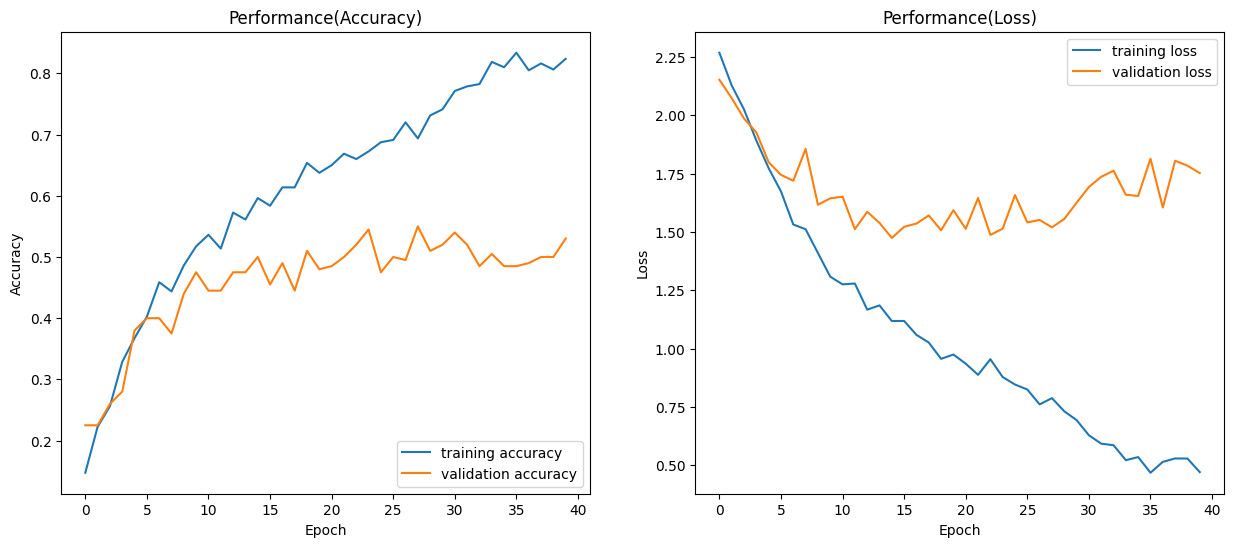

In [580]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

axs[0].plot(hist.history["accuracy"], label="training accuracy")
axs[0].plot(hist.history["val_accuracy"], label="validation accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].set_xlabel("Epoch")
axs[0].legend(loc="lower right")
axs[0].set_title("Performance(Accuracy)")

axs[1].plot(hist.history["loss"], label="training loss")
axs[1].plot(hist.history["val_loss"], label="validation loss")
axs[1].set_ylabel("Loss")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Performance(Loss)")

plt.show()